In [2]:
import pandas as pd
import numpy as np

# For data visualization 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Importing Datasets 

In [4]:
#120OlympicHistory_AthletesResults

athlete_events = pd.read_csv('../Datasets/120OlympicHistory_AthletesResults_dataset/athlete_events.csv')
regions = pd.read_csv('../Datasets/120OlympicHistory_AthletesResults_dataset/noc_regions.csv')


# 2. Data Exploration - 120 Olympic History

2.1 Exploring athlete_events dataset

In [5]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
athlete_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


2.2 Exploring regions dataset


In [7]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# 3.  Data Cleaning

3.1 Check for null values

In [8]:
print(athlete_events.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


Null Values found in Age, Height, Weight and Medals

In [11]:
# Replacing Null VAlues in Medal by No Medal

athlete_events['Medal'].fillna('No Medal', inplace = True)
#print(athlete_events.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


# 4. Merging  athlete_events and regions datasets


3.1 Merging dataset to get a combined set of athlete events and regions.
Complete dataset name "olympics_dataset"

In [12]:
olympics_dataset = pd.merge(athlete_events, regions, on = "NOC", how = "left")
olympics_dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,NaN


3.2 Exploring complete dataset

In [21]:
print(f'Total number of athletes in Olympics: {len(olympics_dataset["ID"].unique())}')
print(f'Years:{olympics_dataset["Year"].unique()}')

Total number of athletes in Olympics: 135571
Years:[1992 2012 1920 1900 1988 1994 1932 2002 1952 1980 2000 1996 1912 1924
 2014 1948 1998 2006 2008 2016 2004 1960 1964 1984 1968 1972 1936 1956
 1928 1976 2010 1906 1904 1908 1896]


# Subset data for Russia / Former Soviet States & Soviet Union 

In [79]:
# Participation
subset_df = olympics_dataset.loc[((olympics_dataset['Team'] == 'Soviet Union')|(olympics_dataset['Team'] == 'Russia')) 
                                 & (olympics_dataset['Year'] >= 1966) & (olympics_dataset['Year'] <= 2017)]

In [76]:
data_country_year = subset_df.groupby(['Year','Team'])['Medal'].count()
data_country_year_df =pd.DataFrame({"data_country_year ": data_country_year})
data_country_year_df.index.name = None
data_country_year_df.sort_values("Year",ascending = True)

,,data_country_year
Year,Team,
1968,Soviet Union,586
1972,Soviet Union,639
1976,Soviet Union,679
1980,Soviet Union,773
1984,Soviet Union,115
1988,Soviet Union,771
1994,Russia,188
1996,Russia,552
1998,Russia,177


Text(0.5, 1.0, 'Medals Won : Russia & Soviet Union (1996-2017)')

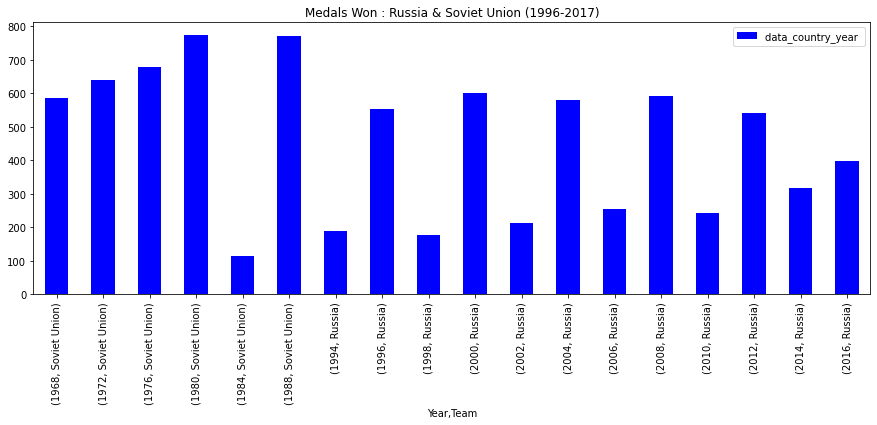

In [77]:
#plot
data_country_year_df.plot.bar(facecolor='blue', figsize=(15,5))
plt.title("Medals Won : Russia & Soviet Union (1996-2017)")

In [46]:
ussr_1966_1991_df = olympics_dataset.loc[(olympics_dataset['Team'] == 'Soviet Union' ) & (olympics_dataset['Year'] >= 1966)
                                      & (olympics_dataset['Year'] <= 1991)]
ussr_1966_1991_df 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
193,88,Nunu Dzhansuhivna Abashydze (-Myslaieva),F,25.0,168.0,105.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's Shot Put,No Medal,Russia,NaN
550,316,Zagalav Abdulbekovich Abdulbekov,M,26.0,160.0,62.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",Gold,Russia,NaN
622,360,Dzhamolidin Mirgarifanovich Abduzhaparov,M,24.0,174.0,72.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Cycling,"Cycling Men's Road Race, Individual",No Medal,Russia,NaN
802,460,Viktor Andreyevich Aboimov,M,22.0,190.0,78.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Swimming,Swimming Men's 400 metres Freestyle,No Medal,Russia,NaN
803,460,Viktor Andreyevich Aboimov,M,22.0,190.0,78.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver,Russia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270968,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,27.0,183.0,100.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's Discus Throw,No Medal,Russia,NaN
270973,135502,"Nataliya Maratovna ""Natasha"" Zvereva",F,17.0,172.0,60.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Tennis,Tennis Women's Singles,No Medal,Russia,NaN
270974,135502,"Nataliya Maratovna ""Natasha"" Zvereva",F,17.0,172.0,60.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Tennis,Tennis Women's Doubles,No Medal,Russia,NaN
270982,135504,Viktor Oleksandrovych Zviahintsev,M,25.0,178.0,79.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Football,Football Men's Football,Bronze,Russia,NaN


In [80]:
data_team_region_year = subset_df.groupby(['Year','Team','region'])['Medal'].count()
data_team_region_year_df =pd.DataFrame({"data_team_region_year ": data_team_region_year})
data_team_region_year_df.index.name = None
data_team_region_year_df.sort_values("Year",ascending = True)

,,,data_team_region_year
Year,Team,region,
1968,Soviet Union,Russia,586
1972,Soviet Union,Russia,639
1976,Soviet Union,Russia,679
1980,Soviet Union,Russia,773
1984,Soviet Union,Russia,115
1988,Soviet Union,Russia,771
1994,Russia,Russia,188
1996,Russia,Russia,552
1998,Russia,Russia,177


In [35]:
russia_1922_2014_df = olympics_dataset.loc[(olympics_dataset['Team'] == 'Russia' ) & (olympics_dataset['Year'] >= 1992)
                                      & (olympics_dataset['Year'] <= 2014)]
russia_1922_2014_df 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,NaN
164,67,Mariya Vasilyevna Abakumova (-Tarabina),F,26.0,179.0,80.0,Russia,RUS,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Javelin Throw,No Medal,Russia,NaN
195,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver,Russia,NaN
196,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's 500 metres Time Trial,No Medal,Russia,NaN
779,449,Inga Eduardovna Abitova,F,26.0,164.0,58.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 10,000 metres",No Medal,Russia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270988,135508,Vera Igorevna Zvonaryova,F,27.0,172.0,59.0,Russia,RUS,2012 Summer,2012,Summer,London,Tennis,Tennis Women's Singles,No Medal,Russia,NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver,Russia,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,No Medal,Russia,NaN
